# Data

In [4]:
%run overlap_distance.ipynb

25548it [00:10, 2406.10it/s]
C:\Users\kaili\AppData\Local\Temp\ipykernel_23596\1680479668.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bus_routes_combined = bus_routes_gdf_3857.groupby(['ServiceNo', 'Direction']).apply(lambda x: LineString(x.geometry.tolist())).reset_index()
724it [00:00, 5031.73it/s]
724it [00:00, 4884.64it/s]
724it [00:00, 6272.48it/s]
724it [00:00, 4974.41it/s]
724it [00:00, 4848.78it/s]
724it [00:00, 6013.20it/s]
2395it [00:14, 169.91it/s]


In [5]:
import geopandas

# mrt lines for adding layer to map
mrt_routes_4326 = {}

mrt_routes_4326['Thomson-East Coast Line'] = TEL_route_gdf_4326
mrt_routes_4326['Downtown Line'] = DTL_route_gdf_4326
mrt_routes_4326['North-East Line'] = NEL_route_gdf_4326
mrt_routes_4326['North-South Line'] = NSL_route_gdf_4326
mrt_routes_4326['East-West Line'] = EWL_route_gdf_4326
mrt_routes_4326['Circle Line'] = CCL_route_gdf_4326

mrt_routes_4326

{'Thomson-East Coast Line':                                             geometry
 0  LINESTRING (103.78567 1.44835, 103.78616 1.436...,
 'Downtown Line':                                             geometry
 0  LINESTRING (103.76157 1.37916, 103.7647 1.3693...,
 'North-East Line':                                             geometry
 0  LINESTRING (103.82145 1.26546, 103.82157 1.265...,
 'North-South Line':                                             geometry
 0  LINESTRING (103.74226 1.33321, 103.74954 1.349...,
 'East-West Line':                                             geometry
 0  LINESTRING (103.94926 1.37295, 103.94516 1.353...,
 'Circle Line':                                             geometry
 0  LINESTRING (103.84583 1.29904, 103.84612 1.298...}

In [6]:
buffered_TEL_gdf = geopandas.GeoDataFrame(geometry = [buffered_TEL], crs = "EPSG:3857")
buffered_TEL_4326 = buffered_TEL_gdf.to_crs("EPSG:4326")

buffered_DTL_gdf = geopandas.GeoDataFrame(geometry = [buffered_DTL], crs = "EPSG:3857")
buffered_DTL_4326 = buffered_DTL_gdf.to_crs("EPSG:4326")

buffered_NEL_gdf = geopandas.GeoDataFrame(geometry = [buffered_NEL], crs = "EPSG:3857")
buffered_NEL_4326 = buffered_NEL_gdf.to_crs("EPSG:4326")

buffered_NSL_gdf = geopandas.GeoDataFrame(geometry = [buffered_NSL], crs = "EPSG:3857")
buffered_NSL_4326 = buffered_NSL_gdf.to_crs("EPSG:4326")

buffered_EWL_gdf = geopandas.GeoDataFrame(geometry = [buffered_EWL], crs = "EPSG:3857")
buffered_EWL_4326 = buffered_EWL_gdf.to_crs("EPSG:4326")

buffered_CCL_gdf = geopandas.GeoDataFrame(geometry = [buffered_CCL], crs = "EPSG:3857")
buffered_CCL_4326 = buffered_CCL_gdf.to_crs("EPSG:4326")

In [7]:
# buffered mrt routes for adding layer to map
buffered_mrt_routes_4326 = {}

buffered_mrt_routes_4326['Thomson-East Coast Line'] = buffered_TEL_4326
buffered_mrt_routes_4326['Downtown Line'] = buffered_DTL_4326
buffered_mrt_routes_4326['North-East Line'] = buffered_NEL_4326
buffered_mrt_routes_4326['North-South Line'] = buffered_NSL_4326
buffered_mrt_routes_4326['East-West Line'] = buffered_EWL_4326
buffered_mrt_routes_4326['Circle Line'] = buffered_CCL_4326

buffered_mrt_routes_4326

{'Thomson-East Coast Line':                                             geometry
 0  POLYGON ((103.78747 1.43773, 103.78845 1.43731...,
 'Downtown Line':                                             geometry
 0  POLYGON ((103.76597 1.36981, 103.76868 1.36283...,
 'North-East Line':                                             geometry
 0  POLYGON ((103.82135 1.2668, 103.83823 1.2824, ...,
 'North-South Line':                                             geometry
 0  POLYGON ((103.74826 1.34944, 103.75052 1.35865...,
 'East-West Line':                                             geometry
 0  POLYGON ((103.78935 1.30847, 103.78936 1.30847...,
 'Circle Line':                                             geometry
 0  POLYGON ((103.79065 1.30514, 103.78867 1.29923...}

In [8]:
# mrt lines colour
mrt_colour = {}

mrt_colour['Thomson-East Coast Line'] = '#9D5B25'
mrt_colour['Downtown Line'] = '#005ec4'
mrt_colour['North-East Line'] = '#9900aa'
mrt_colour['North-South Line'] = '#d42e12'
mrt_colour['East-West Line'] = '#009645'
mrt_colour['Circle Line'] = '#fa9e0d'


# Buffered MRT Lines Visualisation

In [9]:
import folium
from shapely.geometry import mapping

# create base map
mrt_map = folium.Map(location = (1.359394, 103.814301), zoom_start = 12)

# add TEL route layer
folium.GeoJson(
    data = mapping(TEL_route_gdf_4326),
    name = 'Thomson-East Coast Line',
    style_function = lambda x: {
        'color': '#9D5B25',
        'weight': 3
    }
).add_to(mrt_map)

# add buffered TEL route layer
folium.GeoJson(
    data = mapping(buffered_TEL_4326),
    name = 'Buffered Thomson-East Coast Line',
    style_function = lambda x: {
        'color': '#9D5B25',
        'weight': 0.5
    }
).add_to(mrt_map)

# add DTL route layer
folium.GeoJson(
    data = mapping(DTL_route_gdf_4326),
    name = 'Downtown Line',
    style_function = lambda x: {
        'color': '#005ec4',
        'weight': 3
    }
).add_to(mrt_map)

# add buffered TEL route layer
folium.GeoJson(
    data = mapping(buffered_DTL_4326),
    name = 'Buffered Downtown Line',
    style_function = lambda x: {
        'color': '#005ec4',
        'weight': 0.5
    }
).add_to(mrt_map)

# add NEL route layer
folium.GeoJson(
    data = mapping(NEL_route_gdf_4326),
    name = 'North-East Line',
    style_function = lambda x: {
        'color': '#9900aa',
        'weight': 3
    }
).add_to(mrt_map)

# add buffered NEL route layer
folium.GeoJson(
    data = mapping(buffered_NEL_4326),
    name = 'Buffered North-East Line',
    style_function = lambda x: {
        'color': '#9900aa',
        'weight': 0.5
    }
).add_to(mrt_map)

# add NSL route layer
folium.GeoJson(
    data = mapping(NSL_route_gdf_4326),
    name = 'North-South Line',
    style_function = lambda x: {
        'color': '#d42e12',
        'weight': 3
    }
).add_to(mrt_map)

# add buffered NSL route layer
folium.GeoJson(
    data = mapping(buffered_NSL_4326),
    name = 'Buffered North-South Line',
    style_function = lambda x: {
        'color': '#d42e12',
        'weight': 0.5
    }
).add_to(mrt_map)

# add EWL route layer
folium.GeoJson(
    data = mapping(EWL_route_gdf_4326),
    name = 'East-West Line',
    style_function = lambda x: {
        'color': '#009645',
        'weight': 3
    }
).add_to(mrt_map)

# add buffered EWL route layer
folium.GeoJson(
    data = mapping(buffered_EWL_4326),
    name = 'Buffered East-West Line',
    style_function = lambda x: {
        'color': '#009645',
        'weight': 0.5
    }
).add_to(mrt_map)

# add CCL route layer
folium.GeoJson(
    data = mapping(CCL_route_gdf_4326),
    name = 'Circle Line',
    style_function = lambda x: {
        'color': '#fa9e0d',
        'weight': 3
    }
).add_to(mrt_map)

# add buffered CCL route layer
folium.GeoJson(
    data = mapping(buffered_CCL_4326),
    name = 'Buffered Circle Line',
    style_function = lambda x: {
        'color': '#fa9e0d',
        'weight': 0.5
    }
).add_to(mrt_map)


# add toggle for layers
folium.LayerControl(position = 'bottomright').add_to(mrt_map)

mrt_map

In [10]:
# save map as html
# mrt_map.save('/Users/ko-shyan/Downloads/mrt_map.html')

# Visualisation

In [ ]:
mrt_lines = ['Downtown Line', 'East-West Line']
bus_services = [('67', 2), ('63', 1), ('2', 1)]

In [ ]:
import geopandas as gpd

bus_colors = ['purple', 'orange', 'darkred']
bus_service_colors = {service: bus_colors[i] for i, (service, _) in enumerate(bus_services)}

overlap_map = folium.Map(location=(1.359394, 103.814301), zoom_start=12)

# Add MRT lines to the map
for mrt_line in mrt_lines:
    mrt_color = mrt_colour.get(mrt_line, 'gray')  # Use the color from mrt_colour or gray if not found

    folium.GeoJson(
        data=mapping(mrt_routes_4326.get(mrt_line)),
        name=mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 3
        }
    ).add_to(overlap_map)

    # Add buffered MRT route layer
    folium.GeoJson(
        data=mapping(buffered_mrt_routes_4326[mrt_line]),
        name='Buffered ' + mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 0.5,
            'fillOpacity': 0.2
        }
    ).add_to(overlap_map)

# Add bus services to the map
for bus_service, direction in bus_services:
    bus_color = bus_service_colors.get(bus_service, 'black')  # Default to black if no color is assigned

    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 4
        }
    ).add_to(overlap_map)


    # Add intersection layer if there are matching intersections
    bus_overlap_df = bus_routes_overlap[
        (bus_routes_overlap['Bus Service'] == bus_service) &
        (bus_routes_overlap['Direction'] == direction) &
        (bus_routes_overlap['MRT line'] == mrt_line)
    ]
    
    if not bus_overlap_df.empty:
        bus_overlap = [line for line in bus_overlap_df['Intersection'].values[0].geoms]
        bus_overlap_gdf = gpd.GeoDataFrame(geometry=bus_overlap, crs="EPSG:3857")
        bus_overlap_gdf_4326 = bus_overlap_gdf.to_crs(4326)

        folium.GeoJson(
            bus_overlap_gdf_4326,
            name=f'Overlap: Bus {bus_service} - MRT {mrt_line}',
            style_function=lambda x: {
                'color': 'red'
            }
        ).add_to(overlap_map)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops[
        (overlap_bus_stops['Bus Service'] == bus_service) &
        (overlap_bus_stops['Direction'] == direction) &
        (overlap_bus_stops['MRT line'] == mrt_line)
    ]

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - MRT {mrt_line}',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.7
            }
        ).add_to(overlap_map)

# Add toggle for layers
folium.LayerControl(position='bottomright').add_to(overlap_map)

overlap_map


# Alternative for bus route 67

In [16]:
bus_route_67 = bus_routes_combined[bus_routes_combined["ServiceNo"] == "67"].reset_index()
bus_route_67

,index,ServiceNo,Direction,geometry
0,477,67,1,LINESTRING (11548928.398898065 154289.27436885...
1,478,67,2,LINESTRING (11570925.355747303 150749.03122670...


  Route  Direction  Intersection length  \
0   170          1         14543.078093   
1     2          1          7680.607229   
2    28          1          2620.827144   

                                        Intersection  
0  MULTILINESTRING ((11561087.45765838 145208.676...  
1  MULTILINESTRING ((11569959.238010693 147436.55...  
2  GEOMETRYCOLLECTION (LINESTRING (11570572.01745...  
6238.971429983572


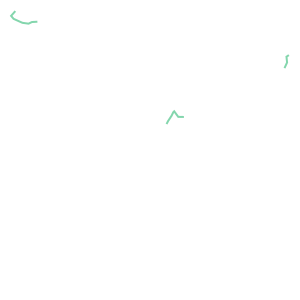

In [17]:
#check top 3 bus routes that overlap bus 67

route_67_line = bus_route_67.loc[1, "geometry"]

bus_routes_combined_gdf = gpd.GeoDataFrame(bus_routes_combined,
                                           geometry = "geometry",
                                           crs = 3857)
bus_routes_combined_gdf_67 = bus_routes_combined_gdf[bus_routes_combined_gdf["ServiceNo"] != "67"]

overlap_routes = []

for i in range(3):
    intersection = bus_routes_combined_gdf_67.intersection(route_67_line)
    intersection_length = intersection.length
    max_overlap_index = intersection_length.idxmax()
    max_overlap_length = max(intersection_length)
    max_overlap = intersection[max_overlap_index]
    max_overlap_route = bus_routes_combined_gdf_67.loc[max_overlap_index, "ServiceNo"]
    max_overlap_direction = bus_routes_combined_gdf_67.loc[max_overlap_index, "Direction"]

    if max_overlap_length == 0:
        break

    overlap_routes.append({
        "Route": max_overlap_route,
        "Direction": max_overlap_direction,
        "Intersection length": max_overlap_length,
        "Intersection": max_overlap
    })
    
    route_67_line = route_67_line.difference(max_overlap)

print(pd.DataFrame(overlap_routes))
overlap_routes_67 = pd.DataFrame(overlap_routes)
print(route_67_line.length)
route_67_line

In [18]:
# find the bus stops that belong to each intersection between the alternative bus routes

overlap_count_output = []

for i, row in tqdm(overlap_routes_67.iterrows()):
    bus_no = row['Route']
    direction = row['Direction']
    bus = bus_routes_gdf_3857[(bus_routes_gdf_3857['ServiceNo'] == bus_no) & (bus_routes_gdf_3857['Direction'] == direction)]
    for j, stop in bus.iterrows():
        if row['Intersection'].contains(stop.geometry):
            overlap_count_output.append({
                'Bus Service': bus_no,
                'Direction': direction,
                'Bus Stop Code': stop['BusStopCode'],
                'Description': stop['Description'],
                'geometry': stop.geometry
            })

overlap_bus_stops_67 = geopandas.GeoDataFrame(overlap_count_output, crs = "EPSG:3857")

3it [00:00, 100.43it/s]


In [19]:
mrt_lines = ['Downtown Line']
bus_services = [('2', 1), ('170', 1), ('28', 1)]
bus_services_target = [('67', 2)]

In [20]:
import geopandas as gpd

mrt_line_colors = {
    'Downtown Line': 'blue'
}

bus_color_target = {"67":'darkgreen'}
bus_colors = ['purple', 'darkblue', 'darkred']
bus_service_colors = {service: bus_colors[i % len(bus_colors)] for i, (service, _) in enumerate(bus_services)}

# Create a base map
overlap_map = folium.Map(location=(1.359394, 103.814301), zoom_start=12)

# Add individual MRT line layers 
for mrt_line in mrt_lines:
    mrt_color = mrt_line_colors.get(mrt_line, 'gray')  
    mrt_group = folium.FeatureGroup(name=f"{mrt_line} MRT Line", show=True)

    folium.GeoJson(
        data=mapping(mrt_routes_4326.get(mrt_line)),
        name=mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 2
        }
    ).add_to(mrt_group)

    # Add buffered MRT route
    folium.GeoJson(
        data=mapping(buffered_mrt_routes_4326[mrt_line]),
        name='Buffered ' + mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 0.5,
            'fillOpacity': 0.2
        }
    ).add_to(mrt_group)
    
    mrt_group.add_to(overlap_map)  

# Add individual bus service layers 
for bus_service, direction in bus_services_target:
    bus_color = bus_color_target.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 4
        }
    ).add_to(bus_group)

    # Add intersection layer if there are matching intersections
    bus_overlap_df = bus_routes_overlap[
        (bus_routes_overlap['Bus Service'] == bus_service) &
        (bus_routes_overlap['Direction'] == direction) &
        (bus_routes_overlap['MRT line'].isin(mrt_lines))
    ]
    
    if not bus_overlap_df.empty:
        bus_overlap = [line for line in bus_overlap_df['Intersection'].values[0].geoms]
        bus_overlap_gdf = gpd.GeoDataFrame(geometry=bus_overlap, crs="EPSG:3857")
        bus_overlap_gdf_4326 = bus_overlap_gdf.to_crs(4326)

        folium.GeoJson(
            bus_overlap_gdf_4326,
            name=f'Overlap: Bus {bus_service} - MRT',
            style_function=lambda x: {
                'color': 'red'
            }
        ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops[
        (overlap_bus_stops['Bus Service'] == bus_service) &
        (overlap_bus_stops['Direction'] == direction) &
        (overlap_bus_stops['MRT line'].isin(mrt_lines))
    ]

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - MRT',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.7
            }
        ).add_to(mrt_group)

    bus_group.add_to(overlap_map)
    mrt_group.add_to(overlap_map)

# Add individual bus service layers 
for bus_service, direction in bus_services:
    bus_color = bus_service_colors.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 3,
            'opacity': 0.5
        }
    ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops_67[
        (overlap_bus_stops_67['Bus Service'] == bus_service) &
        (overlap_bus_stops_67['Direction'] == direction)
    ]

    #print(bus_intersection_bus_stops)

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - 67',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.5
            }
        ).add_to(bus_group)

    bus_group.add_to(overlap_map)

folium.LayerControl(collapsed=False).add_to(overlap_map)

overlap_map

# Alternative for bus route 170

In [21]:
bus_route_170 = bus_routes_combined[bus_routes_combined["ServiceNo"] == "170"].reset_index()
bus_route_170

,index,ServiceNo,Direction,geometry
0,164,170,1,LINESTRING (11561253.11079134 145127.026060371...
1,165,170,2,LINESTRING (11548732.917660505 166319.45539502...


  Route  Direction  Intersection length  \
0    67          1         13755.303883   
1   160          1          9334.571121   
2   178          1          1089.244750   

                                        Intersection  
0  MULTILINESTRING ((11550754.766468793 153483.65...  
1  GEOMETRYCOLLECTION (LINESTRING (11551430.59525...  
2  MULTILINESTRING ((11551635.653995646 160273.08...  
6010.698721369917


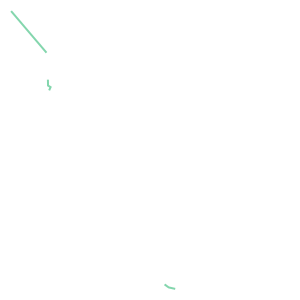

In [22]:
#check top 3 bus routes that overlap bus 170

route_170_line = bus_route_170.loc[1, "geometry"]

bus_routes_combined_gdf_170 = bus_routes_combined_gdf[bus_routes_combined_gdf["ServiceNo"] != "170"]
bus_routes_combined_gdf_170 = bus_routes_combined_gdf_170[~bus_routes_combined_gdf_170["ServiceNo"].str.contains('^170[A-Z]')].reset_index()

overlap_routes = []

for i in range(3):
    intersection = bus_routes_combined_gdf_170.intersection(route_170_line)
    intersection_length = intersection.length
    max_overlap_index = intersection_length.idxmax()
    max_overlap_length = max(intersection_length)
    max_overlap = intersection[max_overlap_index]
    max_overlap_route = bus_routes_combined_gdf_170.loc[max_overlap_index, "ServiceNo"]
    max_overlap_direction = bus_routes_combined_gdf_170.loc[max_overlap_index, "Direction"]

    if max_overlap_length == 0:
        break

    overlap_routes.append({
        "Route": max_overlap_route,
        "Direction": max_overlap_direction,
        "Intersection length": max_overlap_length,
        "Intersection": max_overlap
    })
    
    route_170_line = route_170_line.difference(max_overlap)

print(pd.DataFrame(overlap_routes))
overlap_routes_170 = pd.DataFrame(overlap_routes)
print(route_170_line.length)
route_170_line

In [23]:
# find the bus stops that belong to each intersection between the alternative bus routes

overlap_count_output = []

for i, row in tqdm(overlap_routes_170.iterrows()):
    bus_no = row['Route']
    direction = row['Direction']
    bus = bus_routes_gdf_3857[(bus_routes_gdf_3857['ServiceNo'] == bus_no) & (bus_routes_gdf_3857['Direction'] == direction)]
    for j, stop in bus.iterrows():
        if row['Intersection'].contains(stop.geometry):
            overlap_count_output.append({
                'Bus Service': bus_no,
                'Direction': direction,
                'Bus Stop Code': stop['BusStopCode'],
                'Description': stop['Description'],
                'geometry': stop.geometry
            })

overlap_bus_stops_170 = geopandas.GeoDataFrame(overlap_count_output, crs = "EPSG:3857")

3it [00:00, 92.13it/s]


In [24]:
mrt_lines = ['Downtown Line']
bus_services = [('67', 1), ('160', 1), ('178', 1)]
bus_services_target = [('170', 2)]

In [25]:
import geopandas as gpd

mrt_line_colors = {
    'Downtown Line': 'blue'
}

bus_color_target = {"170":'darkgreen'}
bus_colors = ['purple', 'darkblue', 'darkred']
bus_service_colors = {service: bus_colors[i % len(bus_colors)] for i, (service, _) in enumerate(bus_services)}

# Create a base map
overlap_map = folium.Map(location=(1.359394, 103.814301), zoom_start=12)

# Add individual MRT line layers 
for mrt_line in mrt_lines:
    mrt_color = mrt_line_colors.get(mrt_line, 'gray')  
    mrt_group = folium.FeatureGroup(name=f"{mrt_line} MRT Line", show=True)

    folium.GeoJson(
        data=mapping(mrt_routes_4326.get(mrt_line)),
        name=mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 2
        }
    ).add_to(mrt_group)

    # Add buffered MRT route
    folium.GeoJson(
        data=mapping(buffered_mrt_routes_4326[mrt_line]),
        name='Buffered ' + mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 0.5,
            'fillOpacity': 0.2
        }
    ).add_to(mrt_group)
    
    mrt_group.add_to(overlap_map)  

# Add individual bus service layers 
for bus_service, direction in bus_services_target:
    bus_color = bus_color_target.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 4
        }
    ).add_to(bus_group)

    # Add intersection layer if there are matching intersections
    bus_overlap_df = bus_routes_overlap[
        (bus_routes_overlap['Bus Service'] == bus_service) &
        (bus_routes_overlap['Direction'] == direction) &
        (bus_routes_overlap['MRT line'].isin(mrt_lines))
    ]
    
    if not bus_overlap_df.empty:
        bus_overlap = [line for line in bus_overlap_df['Intersection'].values[0].geoms]
        bus_overlap_gdf = gpd.GeoDataFrame(geometry=bus_overlap, crs="EPSG:3857")
        bus_overlap_gdf_4326 = bus_overlap_gdf.to_crs(4326)

        folium.GeoJson(
            bus_overlap_gdf_4326,
            name=f'Overlap: Bus {bus_service} - MRT',
            style_function=lambda x: {
                'color': 'red'
            }
        ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops[
        (overlap_bus_stops['Bus Service'] == bus_service) &
        (overlap_bus_stops['Direction'] == direction) &
        (overlap_bus_stops['MRT line'].isin(mrt_lines))
    ]

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - MRT',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.7
            }
        ).add_to(mrt_group)

    bus_group.add_to(overlap_map)
    mrt_group.add_to(overlap_map)

# Add individual bus service layers 
for bus_service, direction in bus_services:
    bus_color = bus_service_colors.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 3,
            'opacity': 0.5
        }
    ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops_170[
        (overlap_bus_stops_170['Bus Service'] == bus_service) &
        (overlap_bus_stops_170['Direction'] == direction)
    ]

    #print(bus_intersection_bus_stops)

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - 170',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.5
            }
        ).add_to(bus_group)

    bus_group.add_to(overlap_map)

folium.LayerControl(collapsed=False).add_to(overlap_map)

overlap_map

# Alternative for bus route 63

In [26]:
bus_route_63 = bus_routes_combined[bus_routes_combined["ServiceNo"] == "63"].reset_index()
bus_route_63

,index,ServiceNo,Direction,geometry
0,442,63,1,LINESTRING (11566296.397064393 146880.92287065...


  Route  Direction  Intersection length  \
0    51          1           7008.84921   

                                        Intersection  
0  GEOMETRYCOLLECTION (LINESTRING (11566510.48716...  
26947.507852846007


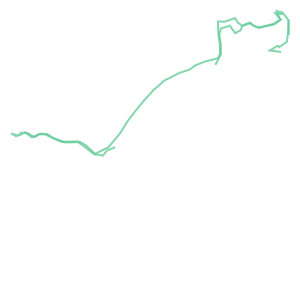

In [27]:
#check top 3 bus routes that overlap bus 63

route_63_line = bus_route_63.loc[0, "geometry"]

bus_routes_combined_gdf_63 = bus_routes_combined_gdf[bus_routes_combined_gdf["ServiceNo"] != "63"]
bus_routes_combined_gdf_63 = bus_routes_combined_gdf_63[~bus_routes_combined_gdf_63["ServiceNo"].str.contains('^63[A-Z]')].reset_index()

overlap_routes = []

for i in range(3):
    intersection = bus_routes_combined_gdf_63.intersection(route_63_line)
    intersection_length = intersection.length
    max_overlap_index = intersection_length.idxmax()
    max_overlap_length = max(intersection_length)
    max_overlap = intersection[max_overlap_index]
    max_overlap_route = bus_routes_combined_gdf_63.loc[max_overlap_index, "ServiceNo"]
    max_overlap_direction = bus_routes_combined_gdf_63.loc[max_overlap_index, "Direction"]

    if max_overlap_length == 0:
        break

    overlap_routes.append({
        "Route": max_overlap_route,
        "Direction": max_overlap_direction,
        "Intersection length": max_overlap_length,
        "Intersection": max_overlap
    })
    
    route_63_line = route_63_line.difference(max_overlap)

print(pd.DataFrame(overlap_routes))
overlap_routes_63 = pd.DataFrame(overlap_routes)
print(route_63_line.length)
route_63_line

In [28]:
# find the bus stops that belong to each intersection between the alternative bus routes

overlap_count_output = []

for i, row in tqdm(overlap_routes_63.iterrows()):
    bus_no = row['Route']
    direction = row['Direction']
    bus = bus_routes_gdf_3857[(bus_routes_gdf_3857['ServiceNo'] == bus_no) & (bus_routes_gdf_3857['Direction'] == direction)]
    for j, stop in bus.iterrows():
        if row['Intersection'].contains(stop.geometry):
            overlap_count_output.append({
                'Bus Service': bus_no,
                'Direction': direction,
                'Bus Stop Code': stop['BusStopCode'],
                'Description': stop['Description'],
                'geometry': stop.geometry
            })

overlap_bus_stops_63 = geopandas.GeoDataFrame(overlap_count_output, crs = "EPSG:3857")

1it [00:00, 86.26it/s]


In [29]:
mrt_lines = ['East-West Line', 'Downtown Line']
bus_services = [('51', 1)]
bus_services_target = [('63', 1)]

In [30]:
import geopandas as gpd

mrt_line_colors = {
    'Downtown Line': 'blue',
    'East_West Line': 'green'
}

bus_color_target = {"63":'darkgreen'}
bus_colors = ['purple', 'darkblue', 'darkred']
bus_service_colors = {service: bus_colors[i % len(bus_colors)] for i, (service, _) in enumerate(bus_services)}

# Create a base map
overlap_map = folium.Map(location=(1.359394, 103.814301), zoom_start=12)

# Add individual MRT line layers 
for mrt_line in mrt_lines:
    mrt_color = mrt_line_colors.get(mrt_line, 'gray')  
    mrt_group = folium.FeatureGroup(name=f"{mrt_line} MRT Line", show=True)

    folium.GeoJson(
        data=mapping(mrt_routes_4326.get(mrt_line)),
        name=mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 2
        }
    ).add_to(mrt_group)

    # Add buffered MRT route
    folium.GeoJson(
        data=mapping(buffered_mrt_routes_4326[mrt_line]),
        name='Buffered ' + mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 0.5,
            'fillOpacity': 0.2
        }
    ).add_to(mrt_group)
    
    mrt_group.add_to(overlap_map)  

# Add individual bus service layers 
for bus_service, direction in bus_services_target:
    bus_color = bus_color_target.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 4
        }
    ).add_to(bus_group)

    # Add intersection layer if there are matching intersections
    bus_overlap_df = bus_routes_overlap[
        (bus_routes_overlap['Bus Service'] == bus_service) &
        (bus_routes_overlap['Direction'] == direction) &
        (bus_routes_overlap['MRT line'].isin(mrt_lines))
    ]
    
    if not bus_overlap_df.empty:
        bus_overlap = [line for line in bus_overlap_df['Intersection'].values[0].geoms]
        bus_overlap_gdf = gpd.GeoDataFrame(geometry=bus_overlap, crs="EPSG:3857")
        bus_overlap_gdf_4326 = bus_overlap_gdf.to_crs(4326)

        folium.GeoJson(
            bus_overlap_gdf_4326,
            name=f'Overlap: Bus {bus_service} - MRT',
            style_function=lambda x: {
                'color': 'red'
            }
        ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops[
        (overlap_bus_stops['Bus Service'] == bus_service) &
        (overlap_bus_stops['Direction'] == direction) &
        (overlap_bus_stops['MRT line'].isin(mrt_lines))
    ]

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - MRT',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.7
            }
        ).add_to(mrt_group)

    bus_group.add_to(overlap_map)
    mrt_group.add_to(overlap_map)

# Add individual bus service layers 
for bus_service, direction in bus_services:
    bus_color = bus_service_colors.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 3,
            'opacity': 0.5
        }
    ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops_63[
        (overlap_bus_stops_63['Bus Service'] == bus_service) &
        (overlap_bus_stops_63['Direction'] == direction)
    ]

    #print(bus_intersection_bus_stops)

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - 63',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.5
            }
        ).add_to(bus_group)

    bus_group.add_to(overlap_map)

folium.LayerControl(collapsed=False).add_to(overlap_map)

overlap_map

# Alternative for bus route 36

In [31]:
bus_route_36 = bus_routes_combined[bus_routes_combined["ServiceNo"] == "36"].reset_index()
bus_route_36

,index,ServiceNo,Direction,geometry
0,349,36,1,LINESTRING (11576026.967264967 150862.32656216...


  Route  Direction  Intersection length  \
0   111          1          7028.454724   
1   110          1          5088.400128   
2    47          1          3949.238680   

                                        Intersection  
0  GEOMETRYCOLLECTION (LINESTRING (11557821.87631...  
1  MULTILINESTRING ((11575203.026555266 149415.15...  
2  GEOMETRYCOLLECTION (LINESTRING (11569383.64283...  
29481.315830722015


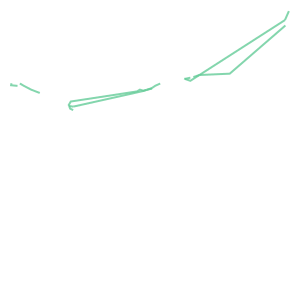

In [32]:
#check top 3 bus routes that overlap bus 36

route_36_line = bus_route_36.loc[0, "geometry"]

bus_routes_combined_gdf_36 = bus_routes_combined_gdf[bus_routes_combined_gdf["ServiceNo"] != "36"]
bus_routes_combined_gdf_36 = bus_routes_combined_gdf_36[~bus_routes_combined_gdf_36["ServiceNo"].str.contains('^36[A-Z]')].reset_index()

overlap_routes = []

for i in range(3):
    intersection = bus_routes_combined_gdf_36.intersection(route_36_line)
    intersection_length = intersection.length
    max_overlap_index = intersection_length.idxmax()
    max_overlap_length = max(intersection_length)
    max_overlap = intersection[max_overlap_index]
    max_overlap_route = bus_routes_combined_gdf_36.loc[max_overlap_index, "ServiceNo"]
    max_overlap_direction = bus_routes_combined_gdf_36.loc[max_overlap_index, "Direction"]

    if max_overlap_length == 0:
        break

    overlap_routes.append({
        "Route": max_overlap_route,
        "Direction": max_overlap_direction,
        "Intersection length": max_overlap_length,
        "Intersection": max_overlap
    })
    
    route_36_line = route_36_line.difference(max_overlap)

print(pd.DataFrame(overlap_routes))
overlap_routes_36 = pd.DataFrame(overlap_routes)
print(route_36_line.length)
route_36_line

In [33]:
# find the bus stops that belong to each intersection between the alternative bus routes

overlap_count_output = []

for i, row in tqdm(overlap_routes_36.iterrows()):
    bus_no = row['Route']
    direction = row['Direction']
    bus = bus_routes_gdf_3857[(bus_routes_gdf_3857['ServiceNo'] == bus_no) & (bus_routes_gdf_3857['Direction'] == direction)]
    for j, stop in bus.iterrows():
        if row['Intersection'].contains(stop.geometry):
            overlap_count_output.append({
                'Bus Service': bus_no,
                'Direction': direction,
                'Bus Stop Code': stop['BusStopCode'],
                'Description': stop['Description'],
                'geometry': stop.geometry
            })

overlap_bus_stops_36 = geopandas.GeoDataFrame(overlap_count_output, crs = "EPSG:3857")

3it [00:00, 128.45it/s]


In [34]:
mrt_lines = ['Thomson-East Coast Line']
bus_services = [('111', 1), ('110', 1), ('47', 1)]
bus_services_target = [('36', 1)]

In [35]:
import geopandas as gpd

mrt_line_colors = {
    'Thomson-East Coast Line': 'brown'
}

bus_color_target = {"36":'darkgreen'}
bus_colors = ['purple', 'darkblue', 'darkred']
bus_service_colors = {service: bus_colors[i % len(bus_colors)] for i, (service, _) in enumerate(bus_services)}

# Create a base map
overlap_map = folium.Map(location=(1.359394, 103.814301), zoom_start=12)

# Add individual MRT line layers 
for mrt_line in mrt_lines:
    mrt_color = mrt_line_colors.get(mrt_line, 'gray')  
    mrt_group = folium.FeatureGroup(name=f"{mrt_line} MRT Line", show=True)

    folium.GeoJson(
        data=mapping(mrt_routes_4326.get(mrt_line)),
        name=mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 2
        }
    ).add_to(mrt_group)

    # Add buffered MRT route
    folium.GeoJson(
        data=mapping(buffered_mrt_routes_4326[mrt_line]),
        name='Buffered ' + mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 0.5,
            'fillOpacity': 0.2
        }
    ).add_to(mrt_group)
    
    mrt_group.add_to(overlap_map)  

# Add individual bus service layers 
for bus_service, direction in bus_services_target:
    bus_color = bus_color_target.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 4
        }
    ).add_to(bus_group)

    # Add intersection layer if there are matching intersections
    bus_overlap_df = bus_routes_overlap[
        (bus_routes_overlap['Bus Service'] == bus_service) &
        (bus_routes_overlap['Direction'] == direction) &
        (bus_routes_overlap['MRT line'].isin(mrt_lines))
    ]
    
    if not bus_overlap_df.empty:
        bus_overlap = [line for line in bus_overlap_df['Intersection'].values[0].geoms]
        bus_overlap_gdf = gpd.GeoDataFrame(geometry=bus_overlap, crs="EPSG:3857")
        bus_overlap_gdf_4326 = bus_overlap_gdf.to_crs(4326)

        folium.GeoJson(
            bus_overlap_gdf_4326,
            name=f'Overlap: Bus {bus_service} - MRT',
            style_function=lambda x: {
                'color': 'red'
            }
        ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops[
        (overlap_bus_stops['Bus Service'] == bus_service) &
        (overlap_bus_stops['Direction'] == direction) &
        (overlap_bus_stops['MRT line'].isin(mrt_lines))
    ]

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - MRT',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.7
            }
        ).add_to(mrt_group)

    bus_group.add_to(overlap_map)
    mrt_group.add_to(overlap_map)

# Add individual bus service layers 
for bus_service, direction in bus_services:
    bus_color = bus_service_colors.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 3,
            'opacity': 0.5
        }
    ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops_36[
        (overlap_bus_stops_36['Bus Service'] == bus_service) &
        (overlap_bus_stops_36['Direction'] == direction)
    ]

    #print(bus_intersection_bus_stops)

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - 36',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.5
            }
        ).add_to(bus_group)

    bus_group.add_to(overlap_map)

folium.LayerControl(collapsed=False).add_to(overlap_map)

overlap_map

# Alternative for bus route 23

In [36]:
bus_route_23 = bus_routes_combined[bus_routes_combined["ServiceNo"] == "23"].reset_index()
bus_route_23

,index,ServiceNo,Direction,geometry
0,252,23,1,LINESTRING (11570925.355747303 150749.03122670...


  Route  Direction  Intersection length  \
0   518          1          7088.153128   
1    64          1          5537.792199   
2    67          2           982.751612   

                                        Intersection  
0  GEOMETRYCOLLECTION (LINESTRING (11570572.01745...  
1  GEOMETRYCOLLECTION (LINESTRING (11562570.74631...  
2  GEOMETRYCOLLECTION (LINESTRING (11570925.35574...  
14271.610814380318


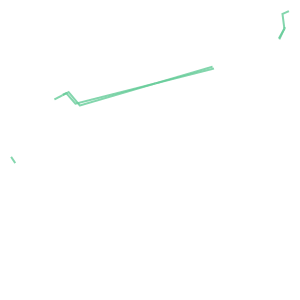

In [37]:
#check top 3 bus routes that overlap bus 23

route_23_line = bus_route_23.loc[0, "geometry"]

bus_routes_combined_gdf_23 = bus_routes_combined_gdf[bus_routes_combined_gdf["ServiceNo"] != "23"]
bus_routes_combined_gdf_23 = bus_routes_combined_gdf_23[~bus_routes_combined_gdf_23["ServiceNo"].str.contains('^23[A-Z]')].reset_index()

overlap_routes = []

for i in range(3):
    intersection = bus_routes_combined_gdf_23.intersection(route_23_line)
    intersection_length = intersection.length
    max_overlap_index = intersection_length.idxmax()
    max_overlap_length = max(intersection_length)
    max_overlap = intersection[max_overlap_index]
    max_overlap_route = bus_routes_combined_gdf_23.loc[max_overlap_index, "ServiceNo"]
    max_overlap_direction = bus_routes_combined_gdf_23.loc[max_overlap_index, "Direction"]

    if max_overlap_length == 0:
        break

    overlap_routes.append({
        "Route": max_overlap_route,
        "Direction": max_overlap_direction,
        "Intersection length": max_overlap_length,
        "Intersection": max_overlap
    })
    
    route_23_line = route_23_line.difference(max_overlap)

print(pd.DataFrame(overlap_routes))
overlap_routes_23 = pd.DataFrame(overlap_routes)
print(route_23_line.length)
route_23_line

In [38]:
# find the bus stops that belong to each intersection between the alternative bus routes

overlap_count_output = []

for i, row in tqdm(overlap_routes_23.iterrows()):
    bus_no = row['Route']
    direction = row['Direction']
    bus = bus_routes_gdf_3857[(bus_routes_gdf_3857['ServiceNo'] == bus_no) & (bus_routes_gdf_3857['Direction'] == direction)]
    for j, stop in bus.iterrows():
        if row['Intersection'].contains(stop.geometry):
            overlap_count_output.append({
                'Bus Service': bus_no,
                'Direction': direction,
                'Bus Stop Code': stop['BusStopCode'],
                'Description': stop['Description'],
                'geometry': stop.geometry
            })

overlap_bus_stops_23 = geopandas.GeoDataFrame(overlap_count_output, crs = "EPSG:3857")

3it [00:00, 113.68it/s]


In [39]:
mrt_lines = ['Downtown Line']
bus_services = [('64', 1), ('518', 1), ('67', 2)]
bus_services_target = [('23', 1)]

In [40]:
import geopandas as gpd

mrt_line_colors = {
    'Downtown Line': 'blue'
}

bus_color_target = {"23":'darkgreen'}
bus_colors = ['purple', 'darkblue', 'darkred']
bus_service_colors = {service: bus_colors[i % len(bus_colors)] for i, (service, _) in enumerate(bus_services)}

# Create a base map
overlap_map = folium.Map(location=(1.359394, 103.814301), zoom_start=12)

# Add individual MRT line layers 
for mrt_line in mrt_lines:
    mrt_color = mrt_line_colors.get(mrt_line, 'gray')  
    mrt_group = folium.FeatureGroup(name=f"{mrt_line} MRT Line", show=True)

    folium.GeoJson(
        data=mapping(mrt_routes_4326.get(mrt_line)),
        name=mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 2
        }
    ).add_to(mrt_group)

    # Add buffered MRT route
    folium.GeoJson(
        data=mapping(buffered_mrt_routes_4326[mrt_line]),
        name='Buffered ' + mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 0.5,
            'fillOpacity': 0.2
        }
    ).add_to(mrt_group)
    
    mrt_group.add_to(overlap_map)  

# Add individual bus service layers 
for bus_service, direction in bus_services_target:
    bus_color = bus_color_target.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 4
        }
    ).add_to(bus_group)

    # Add intersection layer if there are matching intersections
    bus_overlap_df = bus_routes_overlap[
        (bus_routes_overlap['Bus Service'] == bus_service) &
        (bus_routes_overlap['Direction'] == direction) &
        (bus_routes_overlap['MRT line'].isin(mrt_lines))
    ]
    
    if not bus_overlap_df.empty:
        bus_overlap = [line for line in bus_overlap_df['Intersection'].values[0].geoms]
        bus_overlap_gdf = gpd.GeoDataFrame(geometry=bus_overlap, crs="EPSG:3857")
        bus_overlap_gdf_4326 = bus_overlap_gdf.to_crs(4326)

        folium.GeoJson(
            bus_overlap_gdf_4326,
            name=f'Overlap: Bus {bus_service} - MRT',
            style_function=lambda x: {
                'color': 'red'
            }
        ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops[
        (overlap_bus_stops['Bus Service'] == bus_service) &
        (overlap_bus_stops['Direction'] == direction) &
        (overlap_bus_stops['MRT line'].isin(mrt_lines))
    ]

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - MRT',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.7
            }
        ).add_to(mrt_group)

    bus_group.add_to(overlap_map)
    mrt_group.add_to(overlap_map)

# Add individual bus service layers 
for bus_service, direction in bus_services:
    bus_color = bus_service_colors.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 3,
            'opacity': 0.5
        }
    ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops_23[
        (overlap_bus_stops_23['Bus Service'] == bus_service) &
        (overlap_bus_stops_23['Direction'] == direction)
    ]

    #print(bus_intersection_bus_stops)

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - 23',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.5
            }
        ).add_to(bus_group)

    bus_group.add_to(overlap_map)

folium.LayerControl(collapsed=False).add_to(overlap_map)

overlap_map

# Alternative for bus route 2

In [41]:
bus_route_2 = bus_routes_combined[bus_routes_combined["ServiceNo"] == "2"].reset_index()
bus_route_2

,index,ServiceNo,Direction,geometry
0,233,2,1,LINESTRING (11575849.523471242 154715.65777310...
1,234,2,2,LINESTRING (11558749.120225996 142039.15708173...


  Route  Direction  Intersection length  \
0    67          1          7717.782944   
1     9          1          4355.547724   
2    12          2          4316.638185   

                                        Intersection  
0  MULTILINESTRING ((11562463.660933318 145810.86...  
1  GEOMETRYCOLLECTION (LINESTRING (11569956.54310...  
2  GEOMETRYCOLLECTION (LINESTRING (11558749.12022...  
7956.339363163116


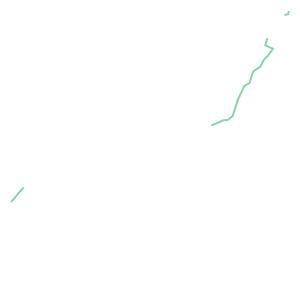

In [42]:
#check top 3 bus routes that overlap bus 2

route_2_line = bus_route_2.loc[1, "geometry"]

bus_routes_combined_gdf_2 = bus_routes_combined_gdf[bus_routes_combined_gdf["ServiceNo"] != "2"]
bus_routes_combined_gdf_2 = bus_routes_combined_gdf_2[~bus_routes_combined_gdf_2["ServiceNo"].str.contains('^2[A-Z]')].reset_index()

overlap_routes = []

for i in range(3):
    intersection = bus_routes_combined_gdf_2.intersection(route_2_line)
    intersection_length = intersection.length
    max_overlap_index = intersection_length.idxmax()
    max_overlap_length = max(intersection_length)
    max_overlap = intersection[max_overlap_index]
    max_overlap_route = bus_routes_combined_gdf_2.loc[max_overlap_index, "ServiceNo"]
    max_overlap_direction = bus_routes_combined_gdf_2.loc[max_overlap_index, "Direction"]

    if max_overlap_length == 0:
        break

    overlap_routes.append({
        "Route": max_overlap_route,
        "Direction": max_overlap_direction,
        "Intersection length": max_overlap_length,
        "Intersection": max_overlap
    })
    
    route_2_line = route_2_line.difference(max_overlap)

print(pd.DataFrame(overlap_routes))
overlap_routes_2 = pd.DataFrame(overlap_routes)
print(route_2_line.length)
route_2_line

In [43]:
# find the bus stops that belong to each intersection between the alternative bus routes

overlap_count_output = []

for i, row in tqdm(overlap_routes_2.iterrows()):
    bus_no = row['Route']
    direction = row['Direction']
    bus = bus_routes_gdf_3857[(bus_routes_gdf_3857['ServiceNo'] == bus_no) & (bus_routes_gdf_3857['Direction'] == direction)]
    for j, stop in bus.iterrows():
        if row['Intersection'].contains(stop.geometry):
            overlap_count_output.append({
                'Bus Service': bus_no,
                'Direction': direction,
                'Bus Stop Code': stop['BusStopCode'],
                'Description': stop['Description'],
                'geometry': stop.geometry
            })

overlap_bus_stops_2 = geopandas.GeoDataFrame(overlap_count_output, crs = "EPSG:3857")

3it [00:00, 100.23it/s]


In [44]:
mrt_lines = ['East-West Line']
bus_services = [('12', 2), ('9', 1), ('67', 1)]
bus_services_target = [('2', 2)]

In [46]:
import geopandas as gpd

mrt_line_colors = {
    'East-West Line': 'green'
}

bus_color_target = {"2":'black'}
bus_colors = ['purple', 'darkblue', 'darkred']
bus_service_colors = {service: bus_colors[i % len(bus_colors)] for i, (service, _) in enumerate(bus_services)}

# Create a base map
overlap_map = folium.Map(location=(1.359394, 103.814301), zoom_start=12)

# Add individual MRT line layers 
for mrt_line in mrt_lines:
    mrt_color = mrt_line_colors.get(mrt_line, 'gray')  
    mrt_group = folium.FeatureGroup(name=f"{mrt_line} MRT Line", show=True)

    folium.GeoJson(
        data=mapping(mrt_routes_4326.get(mrt_line)),
        name=mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 2
        }
    ).add_to(mrt_group)

    # Add buffered MRT route
    folium.GeoJson(
        data=mapping(buffered_mrt_routes_4326[mrt_line]),
        name='Buffered ' + mrt_line,
        style_function=lambda x, color=mrt_color: {
            'color': color,
            'weight': 0.5,
            'fillOpacity': 0.2
        }
    ).add_to(mrt_group)
    
    mrt_group.add_to(overlap_map)  

# Add individual bus service layers 
for bus_service, direction in bus_services_target:
    bus_color = bus_color_target.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 4
        }
    ).add_to(bus_group)

    # Add intersection layer if there are matching intersections
    bus_overlap_df = bus_routes_overlap[
        (bus_routes_overlap['Bus Service'] == bus_service) &
        (bus_routes_overlap['Direction'] == direction) &
        (bus_routes_overlap['MRT line'].isin(mrt_lines))
    ]
    
    if not bus_overlap_df.empty:
        bus_overlap = [line for line in bus_overlap_df['Intersection'].values[0].geoms]
        bus_overlap_gdf = gpd.GeoDataFrame(geometry=bus_overlap, crs="EPSG:3857")
        bus_overlap_gdf_4326 = bus_overlap_gdf.to_crs(4326)

        folium.GeoJson(
            bus_overlap_gdf_4326,
            name=f'Overlap: Bus {bus_service} - MRT',
            style_function=lambda x: {
                'color': 'red'
            }
        ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops[
        (overlap_bus_stops['Bus Service'] == bus_service) &
        (overlap_bus_stops['Direction'] == direction) &
        (overlap_bus_stops['MRT line'].isin(mrt_lines))
    ]

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - MRT',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.7
            }
        ).add_to(mrt_group)

    bus_group.add_to(overlap_map)
    mrt_group.add_to(overlap_map)

# Add individual bus service layers 
for bus_service, direction in bus_services:
    bus_color = bus_service_colors.get(bus_service, 'black')  
    bus_group = folium.FeatureGroup(name=f"Bus Service {bus_service}", show=True)
    bus = bus_routes_combined[(bus_routes_combined['ServiceNo'] == bus_service) & (bus_routes_combined['Direction'] == direction)]
    bus_gdf = gpd.GeoDataFrame(bus, geometry=bus['geometry'], crs="EPSG:3857")
    bus_gdf_4326 = bus_gdf.to_crs(4326)

    folium.GeoJson(
        data=mapping(bus_gdf_4326),
        name='Bus Route: ' + bus_service,
        style_function=lambda x, color=bus_color: {
            'color': color,
            'weight': 3,
            'opacity': 0.5
        }
    ).add_to(bus_group)

    # Add intersection bus stops layer if there are matching bus stops
    bus_intersection_bus_stops = overlap_bus_stops_2[
        (overlap_bus_stops_2['Bus Service'] == bus_service) &
        (overlap_bus_stops_2['Direction'] == direction)
    ]

    #print(bus_intersection_bus_stops)

    if not bus_intersection_bus_stops.empty:
        bus_intersection_bus_stops_4326 = bus_intersection_bus_stops.to_crs(4326)

        bus_stop_tooltip = folium.GeoJsonTooltip(
            fields=["Bus Stop Code", "Description"],
            localize=True,
            sticky=False,
            labels=True,
            style="""
                background-color: #F0EFEF;
                border: 0.5px solid black;
                border-radius: 3px;
                box-shadow: 2px;
            """,
            max_width=800,
        )

        folium.GeoJson(
            data=mapping(bus_intersection_bus_stops_4326),
            name=f'Overlap Bus Stops for Bus {bus_service} - 2',
            tooltip=bus_stop_tooltip,
            style_function=lambda x, color=bus_color: {
                'color': color,
                'fillOpacity': 0.5
            }
        ).add_to(bus_group)

    bus_group.add_to(overlap_map)

folium.LayerControl(collapsed=False).add_to(overlap_map)

overlap_map